In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

## 1. Select some specific colors (white or yellow)
# white color mask
# ref:https://zhuanlan.zhihu.com/p/67930839
img = cv2.imread("./assets/line_detection.png")
#converted = convert_hls(img)
image = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
lower = np.uint8([0, 200, 0])
upper = np.uint8([255, 255, 255])
white_mask = cv2.inRange(image, lower, upper)
# yellow color mask
lower = np.uint8([10, 0,   100])
upper = np.uint8([40, 255, 255])
yellow_mask = cv2.inRange(image, lower, upper)
# combine the mask
mask = cv2.bitwise_or(white_mask, yellow_mask)
result = img.copy()

In [2]:
from PIL import Image

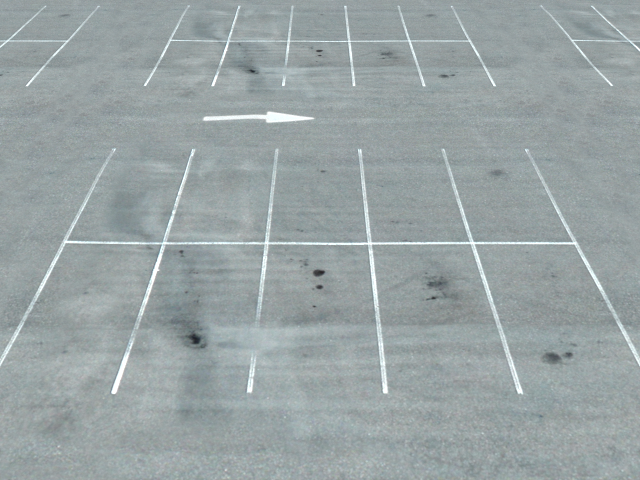

In [3]:
Image.fromarray(result)

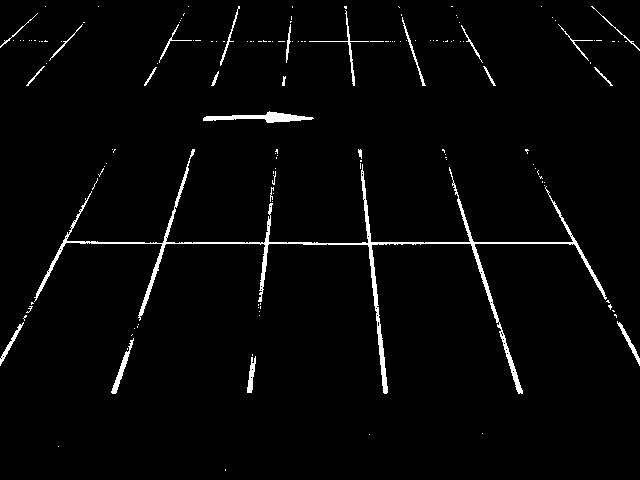

In [4]:
Image.fromarray(mask)

2. Repeat the dilation and erosion until the image can not be changed (reference )

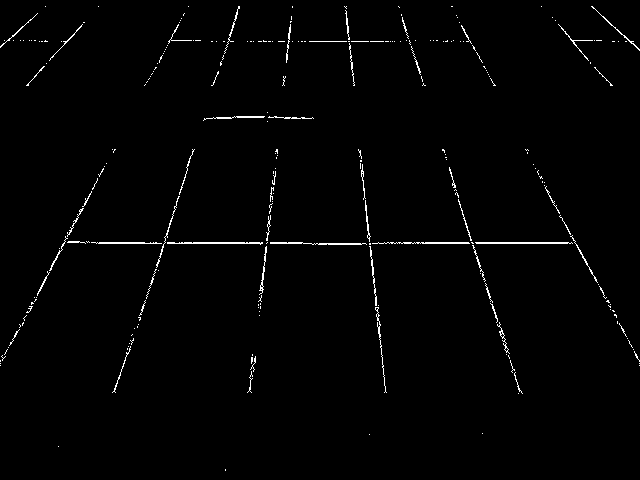

In [5]:
height,width = mask.shape
skel = np.zeros([height,width],dtype=np.uint8)      #[height,width,3]
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
temp_nonzero = np.count_nonzero(mask)
while(np.count_nonzero(mask) != 0 ):
    eroded = cv2.erode(mask,kernel)
    # cv2.imshow("eroded",eroded)
    Image.fromarray(eroded)
    temp = cv2.dilate(eroded,kernel)
    # cv2.imshow("dilate",temp)
    Image.fromarray(temp)
    temp = cv2.subtract(mask,temp)
    skel = cv2.bitwise_or(skel,temp)
    mask = eroded.copy()
 
# cv2.imshow("skel",skel)
Image.fromarray(skel)

## 3. Apply the canny to filter the lines and use HoughLinesP to get the lines

In [6]:
edges = cv2.Canny(skel, 50, 150)
# cv2.imshow("edges",edges)
Image.fromarray(edges)
lines = cv2.HoughLinesP(edges,1,np.pi/180,40,minLineLength=30,maxLineGap=30)
i = 0
for x1,y1,x2,y2 in lines[0]:
    i+=1
    cv2.line(result,(x1,y1),(x2,y2),(255,0,0),1)
print(i)

# cv2.imshow("res",result)
# cv2.waitKey(0)


1


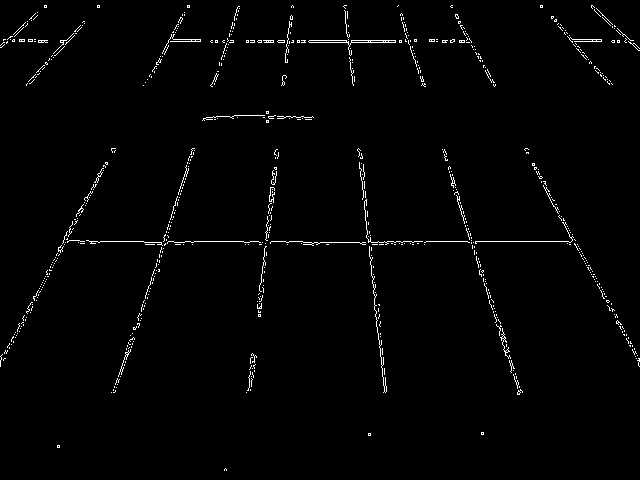

In [7]:
Image.fromarray(edges)

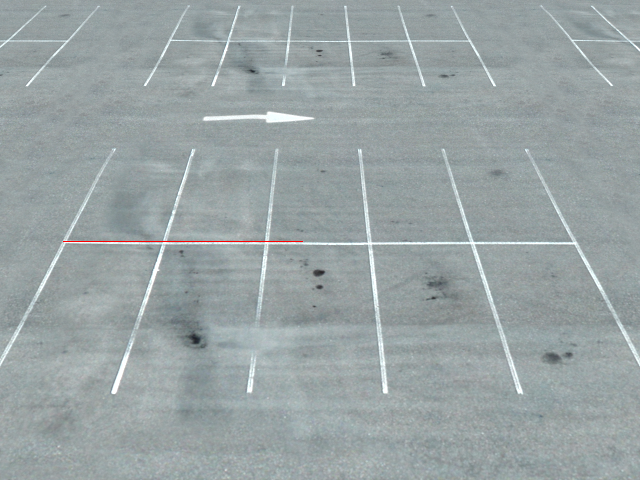

In [8]:
Image.fromarray(result)

https://colab.research.google.com/drive/1x8Q9dJWsCm4IkJEDjbV7FfEO9nrzEP8m?usp=sharing#scrollTo=1FFA8-ZHWbXJ
https://z-uo.medium.com/line-detection-computer-vision-vs-deep-neural-network-27c6b40a14c8

In [9]:
import cv2 as cv
from PIL import Image
import numpy as np

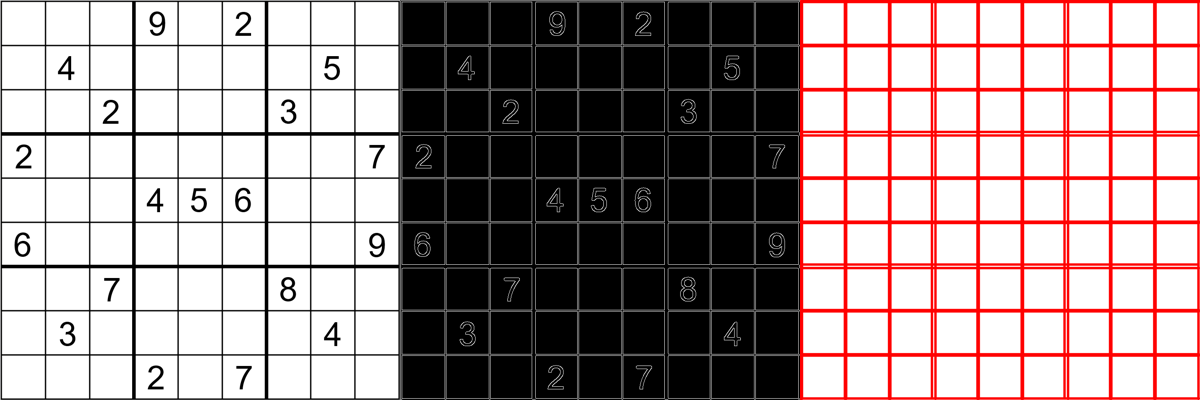

In [12]:
opened = Image.open("assets/sudoku-png-6.png")
src = cv.imread(cv.samples.findFile("assets/sudoku-png-6.png"), cv.IMREAD_GRAYSCALE)

dst = cv.Canny(src, 50, 200, None, 3)
cv.imwrite('canny.png', dst)
canny = Image.open('canny.png')

linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

# plot
# cdst = cv.cvtColor(src, cv.COLOR_GRAY2BGR)
# cdstP = np.copy(cdst)  
cdstP = np.zeros(src.shape,dtype=np.uint8)
cdstP.fill(255) # or img[:] = 255
cdstP = cv.cvtColor(cdstP, cv.COLOR_GRAY2BGR)

if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

cv.imwrite('lines.png', cdstP)
lines = Image.open('lines.png')

w_scaled = 400
h_scaled = int(opened.size[1] * w_scaled /opened.size[0])
new_image = Image.new('RGB',(3*w_scaled, h_scaled), (250,250,250))

new_image.paste(opened.resize((w_scaled, h_scaled)),(0,0))
new_image.paste(canny.resize((w_scaled, h_scaled)),(w_scaled,0))
new_image.paste(lines.resize((w_scaled, h_scaled)),(2*w_scaled,0))

new_image

In [14]:
linesP[0]

array([[306, 903, 306,   1]], dtype=int32)

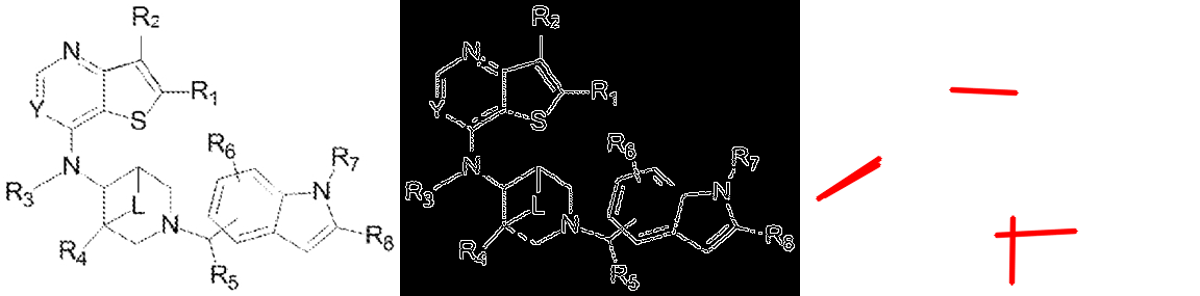

In [24]:
opened = Image.open("assets/20250727-115727.jpg")
src = cv.imread(cv.samples.findFile("assets/20250727-115727.jpg"), cv.IMREAD_GRAYSCALE)

# blurred = cv2.GaussianBlur(src, (5, 5), 0)
dst = cv2.Canny(blurred, 50, 200, None, 3)
# dst = cv.Canny(dst, 50, 200, None, 3)
cv.imwrite('canny.png', dst)
canny = Image.open('canny.png')

linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 10, None, 50, 10)

# plot
# cdst = cv.cvtColor(src, cv.COLOR_GRAY2BGR)
# cdstP = np.copy(cdst)  
cdstP = np.zeros(src.shape,dtype=np.uint8)
cdstP.fill(255) # or img[:] = 255
cdstP = cv.cvtColor(cdstP, cv.COLOR_GRAY2BGR)

if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

cv.imwrite('lines.png', cdstP)
lines = Image.open('lines.png')

w_scaled = 400
h_scaled = int(opened.size[1] * w_scaled /opened.size[0])
new_image = Image.new('RGB',(3*w_scaled, h_scaled), (250,250,250))

new_image.paste(opened.resize((w_scaled, h_scaled)),(0,0))
new_image.paste(canny.resize((w_scaled, h_scaled)),(w_scaled,0))
new_image.paste(lines.resize((w_scaled, h_scaled)),(2*w_scaled,0))

new_image

In [25]:
linesP

array([[[188, 226, 264, 222]],

       [[203, 272, 204, 209]],

       [[ 17, 191,  76, 152]],

       [[145,  86, 207,  89]],

       [[ 23, 188,  75, 158]]], dtype=int32)

In [17]:
dst

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)